<a href="https://colab.research.google.com/github/scheck-bu/Cable-Tester/blob/main/SocialMedia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install script for atproto on Google Colab
# pip install -U atproto

**Import initial libraries.**

In [ ]:
from atproto import Client
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from textblob import TextBlob



**Create a client and log into BlueSky**

In [ ]:
client = Client()
client.login('garths.bsky.social', 'J42S!gPN.jxSgED')
feed_data = []

**Define a fucntion to get posts from BlueSky Feed.**

In [ ]:
def GetFeedPosts(url, start_dt, end_dt):
    try:
        feed_data.clear()
        url = url.replace("'", "")

        addr_arr = str(url).split('=')
        addr = addr_arr[1]

        res = client.get_post_thread(uri=addr)
        thread = res.thread
        GetThreadPosts(thread, start_dt, end_dt)

    except:
        a=''
        #print()

**Define a function to get posts from thread.**

In [ ]:


nltk.downloader.download('vader_lexicon')
x = 0
model = SentimentIntensityAnalyzer()
df = pd.DataFrame(columns=['date','score'])
df2 = pd.DataFrame(columns=['date','score'])

scores = []
datetime_object = ''

polarities = []
polarities2 = []
dates = []

has_date= False
def GetThreadPosts(thread, start_dt, end_dt):
    for post in thread:
        elements = str(post).split(',')
        for element in elements:
            if "created_at=" in element and not "Record" in element:
                elements2 = str(element).split('=')
                dt = elements2[1]
                dt = dt.replace("T", " ")
                dt = dt.replace("Z", " ")
                dt = dt.replace("'", "")
                dt = dt.split('.')[0]
                datetime_object = datetime.strptime(dt, '%Y-%m-%d %H:%M:%S')
                hasDate = True
                val =int(datetime_object.timestamp())

            elif "text=" in element and not "py_type=" in element:
                if start_dt < datetime_object and end_dt > datetime_object:
                  elements3 = str(element).split('=')
                  if elements3[1] != '{})]' and elements3[1] != '{})':
                    print(elements3[1])
                    feed_data.append(elements3[1])
                    wiki = TextBlob(elements3[1])
                    dates.append(datetime_object)
                    polarities2.append(wiki.sentiment.polarity)

                    val = model.polarity_scores(elements3[1])
                    val = val['compound']

                    polarities.append(val)




[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


**Create an arrays with posts and dates.**

In [ ]:
start_dt = datetime.strptime("2023-6-1 9:10:00", '%Y-%m-%d %H:%M:%S')
end_dt = datetime.strptime("2025-1-10 12:00:00", '%Y-%m-%d %H:%M:%S')

# data = client.get_timeline(cursor='', limit=100)

#'https://bsky.social/xrpc/com.atproto.identity.resolveHandle?handle=aendra.bsky.social'

# data = client.get_author_feed(
#     actor='did:plc:u62ppzevvgzrnuqlm45ekmup',
#     limit=30,
# )


# https://bsky.app/profile/aendra.com/feed/news-2-0
# https://bsky.app/profile/aendra.com/feed/verified-news
#'at://did:plc:z72i7hdynmk6r22z27h6tvur/app.bsky.feed.generator/whats-hot'

# print('Get what is hot feed.')
data = client.app.bsky.feed.get_feed({
    'feed': 'at://did:plc:z72i7hdynmk6r22z27h6tvur/app.bsky.feed.generator/whats-hot',
    'limit': 100,
}, headers={'Accept-Language': 'en'})

feed = data.feed

elements = str(feed).split(',')
for element in elements:
    if "uri=" in element:
        if "at:" in element:
            GetFeedPosts(element, start_dt, end_dt)

Streaming output truncated to the last 5000 lines.
'Also
''
"And
"Conflating Canadian universal health care with what's happening in the US is ridiculous. FAIL"
'+mute'
'THAT IS AWESOME NEWS HERE IS TO IT COLAPSING ENTIRELY'
'too lazy to copy and paste? please keep your Nazihub screenshots off my discover feed.'
'My PCP of 20 yrs is no longer taking United Healthcare.'
''
'Murder is never justifiable.'
'I’m with you
"Of course it is. There's even a legal name for it: justifiable homicide."
"Anyone who thinks Luigi's act didn't achieve anything
'Geez.  I have United Healthcare Medicare and I was trembling with worry with how much my co-pay would be on my new prescription.. it was ok but I am getting an MRI scheduled and a spinal tap after that and I am hoping it is covered..'
'If it isn’t
'I mean
'Good. Hope it goes belly up'
'Thank you Luigi'
''
'Nice!'
'Hero'
'Ooooh! Times that by 8 and you should have the U.S. Single Payer Insurance Cost!'
'That’s exactly right. It’s more important t

**Create dataframes and populate with data.**

In [ ]:
df = pd.DataFrame(columns=['labels'])
df = pd.DataFrame(columns=['scores'])

df2 = pd.DataFrame(columns=['dates'])
df2 = pd.DataFrame(columns=['scores'])

normalized_array = polarities

df['labels'] = normalized_array
df['scores'] = polarities2

df2['dates'] = dates
df2['scores'] = polarities2

df2 = df2.sort_values(by='dates')


**Display post sentiment scores by date.**

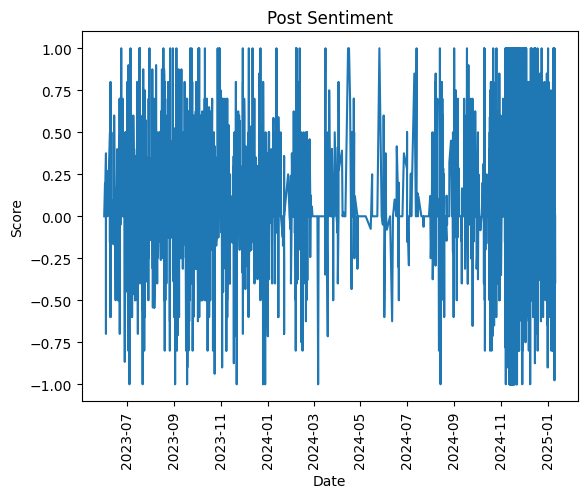

In [ ]:
plt.plot(df2['dates'], df2['scores'])

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Score')
plt.title('Post Sentiment')
plt.xticks(rotation=90)

# Show the plot
plt.show()

**Display post count by date.**

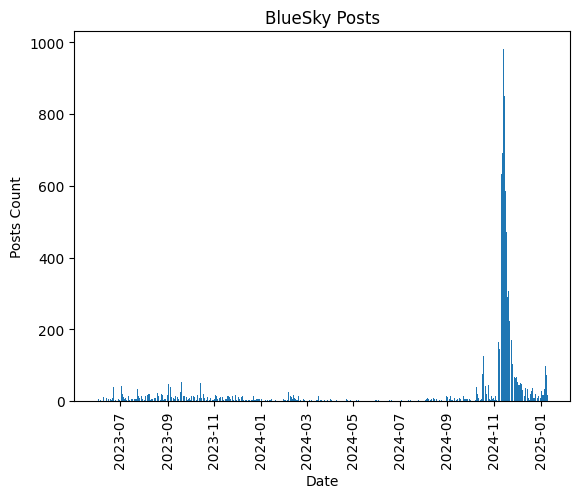

In [ ]:
df2.set_index('dates', inplace=True)

# Count occurrences per day
daily_counts = df2.resample('D').count()

plt.bar(daily_counts.index, daily_counts['scores'])

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Posts Count')
plt.title('BlueSky Posts')
plt.xticks(rotation=90)

# Show the plot
plt.show()

**Get posts for smaller date range.**

In [ ]:
polarities = []
polarities2 = []
dates = []

start_dt = datetime.strptime("2024-11-1 9:10:00", '%Y-%m-%d %H:%M:%S')
end_dt = datetime.strptime("2024-12-1 12:00:00", '%Y-%m-%d %H:%M:%S')

data = client.app.bsky.feed.get_feed({
    'feed': 'at://did:plc:z72i7hdynmk6r22z27h6tvur/app.bsky.feed.generator/whats-hot',
    'limit': 100,
}, headers={'Accept-Language': 'en'})

next_page = data.cursor

elements = str(feed).split(',')
for element in elements:
    if "uri=" in element:
        if "at:" in element:
            GetFeedPosts(element, start_dt, end_dt)



Streaming output truncated to the last 5000 lines.
'🙏🙏🙏🙏🙏'
'🙌🏼🙌🏼💙💙'
'👍🏻👍🏿👍🏾👍🏽👍🏼👍'
'What about the rest of the united states . Remember project 2025. \nFinally took a nap I see.'
"It's a shame that Trump and other conservatives are already trying to take credit for it."
'thanks
"Good luck with that last one. Nobody's been able to solve it yet."
'Maybe put it in an escrow account like with bad landlords?'
'Hi Tim
'Help us!  He’s a madman 🤡🤬'
'Sounds like #Minnesota  has the right priorities. You are a beakon of light in a otherwise disheartened country.'
'Nah I think we’re fkd tbh.'
'You can always move to Arkansas 😂'
'Excuse me?'
'👍😊💙'
'The OG tweet is honestly serious?'
'The American Xtian right is indistinguishable from the Taliban. Just different sky fairies.'
'Karma would be nice.'
'I hope one day centuries from now that thing is gathering dust in some forgotten corner of some crumbling museum.'
'🤣'
'Bible probably made in china…. Oh look… it has the US constitution in it….'
"Maybe 

**Show array lenght of dates.**

In [ ]:
len(dates)

8281

**Show array length of posts.**

In [ ]:
len(polarities2)

8281

**Create dataframes from scores and dates.**

In [ ]:
df = pd.DataFrame(columns=['labels'])
df = pd.DataFrame(columns=['scores'])

df2 = pd.DataFrame(columns=['dates'])
df2 = pd.DataFrame(columns=['scores'])

normalized_array = polarities

df['labels'] = normalized_array
df['scores'] = polarities2

df2['dates'] = dates
df2['scores'] = polarities2

df2 = df2.sort_values(by='dates')


In [ ]:
df

,scores,labels
0,0.000000,0.0000
1,0.000000,0.0000
2,0.000000,-0.5423
3,0.800000,0.6249
4,0.700000,0.4404
...,...,...
8253,0.000000,0.0000
8254,0.214815,0.6124
8255,0.133333,0.7783
8256,0.043182,0.0000


**Display scatter plot of TextBlob analysis vs Vader analysis.**

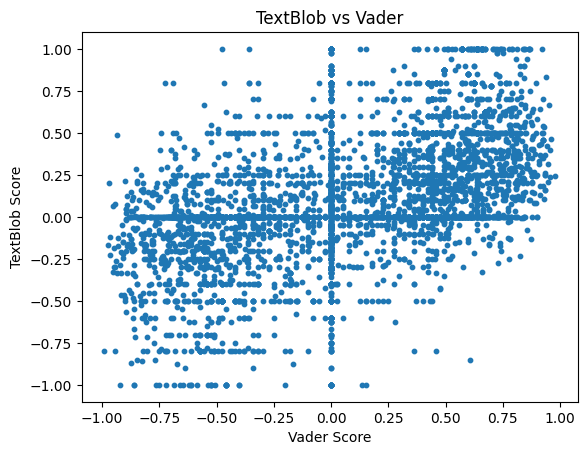

In [ ]:
plt.scatter(df['labels'], df['scores'], s = 10)
plt.xlabel('Vader Score')
plt.ylabel('TextBlob Score')
plt.title('TextBlob vs Vader')
plt.show()

**Display line graph of sentiment scores over time.**

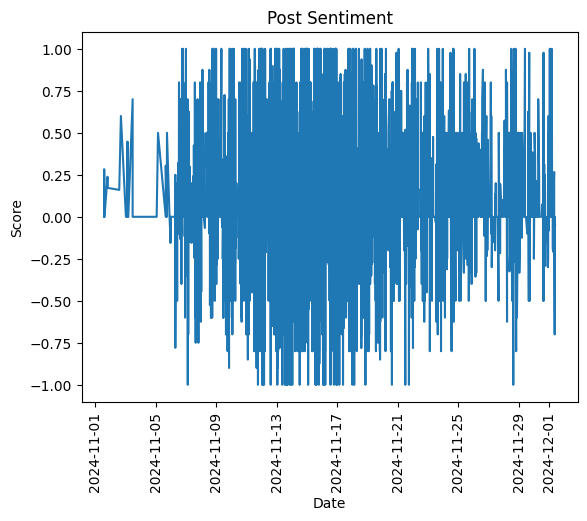

In [ ]:
plt.plot(df2['dates'], df2['scores'])

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Score')
plt.title('Post Sentiment')
plt.xticks(rotation=90)

# Show the plot
plt.show()

**Index dataframe 2 by dates and plot number of pots over time.**

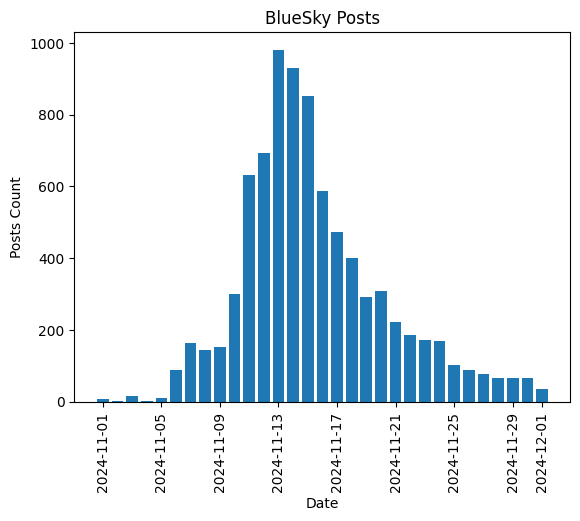

In [ ]:
df2.set_index('dates', inplace=True)

# Count occurrences per day
daily_counts = df2.resample('D').count()

plt.bar(daily_counts.index, daily_counts['scores'])

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Posts Count')
plt.title('BlueSky Posts')
plt.xticks(rotation=90)

# Show the plot
plt.show()

**Plot over all sentiment of posts.**

{'neg': 0.111, 'neu': 0.8, 'pos': 0.088, 'compound': -0.9955}


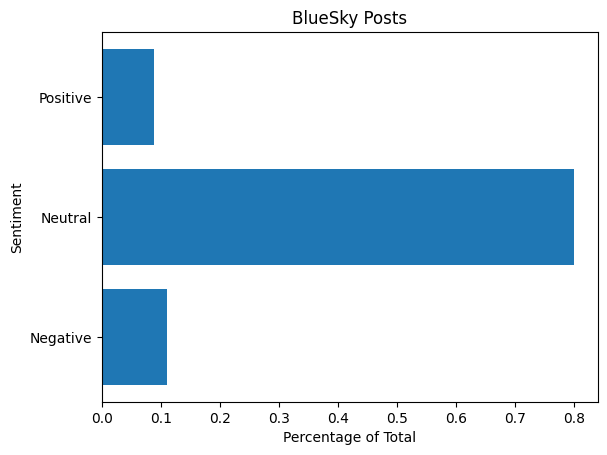

In [ ]:
import numpy as np
model = SentimentIntensityAnalyzer()

text = ",".join(str(x) for x in feed_data)
scores = model.polarity_scores(str(text))
#print(scores['neg'])
print(scores)

x = np.array(["Negative", "Neutral", "Positive"])
y = np.array([scores['neg'], scores['neu'], scores['pos']])

plt.xlabel('Percentage of Total')
plt.ylabel('Sentiment')
plt.title('BlueSky Posts')

plt.barh(x,y)
plt.show()

**Define a function to split posts into a list of words.**

In [ ]:
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
english_stemmer=nltk.stem.SnowballStemmer('english')

def text_to_word_list(text, remove_stopwords=True):
    # Pre process and convert texts to a list of words
    # method inspired by method from eliorc github repo: https://github.com/eliorc/Medium/blob/master/MaLSTM.ipynb

    text = str(text)
    text = text.lower()

    # Clean the text
    text = re.sub(r'[^a-zA-Z0-9]',' ', text)

    words = text.split()

    stops = set(stopwords.words("english"))
    words = [w for w in words if not w in stops]

    b=[]
    stemmer = english_stemmer
    for word in words:
        b.append(stemmer.stem(word))

    return b

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Split posts into words and display word counts.**

In [ ]:
# import the necessary libraries
import json
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

text = ",".join(str(x) for x in feed_data)

data_list = text_to_word_list(text)

In [ ]:
from collections import Counter

wordCount = Counter(data_list)

wordCount = {x: count for x, count in wordCount.items() if count >= 6}
wordCount = dict(sorted(wordCount.items(), key=lambda item: item[1], reverse=True))

<BarContainer object of 30 artists>

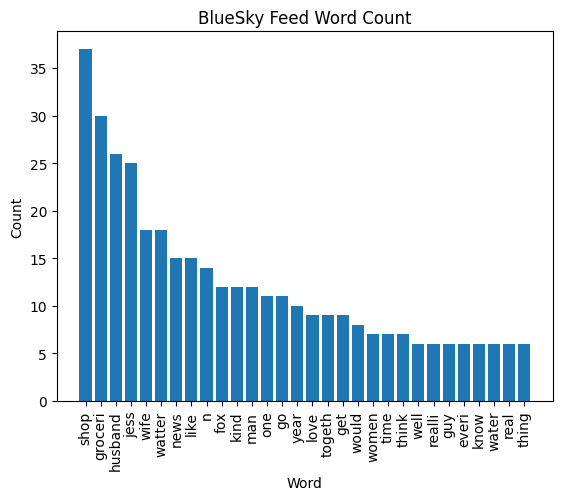

In [ ]:
wordCount
plt.xticks(rotation=90)
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('BlueSky Feed Word Count')
plt.bar(wordCount.keys(), wordCount.values())

**Get news in JSON format.**

In [ ]:
import requests
url = ('https://newsapi.org/v2/top-headlines?'
       'country=us&'
       'apiKey=47c6160746b543e3b4292742a2fbe70f')
response = requests.get(url)
print(response.json())

{'status': 'ok', 'totalResults': 30, 'articles': [{'source': {'id': None, 'name': 'Yahoo Entertainment'}, 'author': 'ANDREW DALTON', 'title': 'A$AP Rocky assault trial heads to opening statements as a jury is seated - Yahoo! Voices', 'description': 'A jury of five men and seven women was seated Thursday for the trial of rapper A$AP Rocky, who is charged with firing a gun at a former friend in 2021...', 'url': 'https://www.yahoo.com/news/ap-rocky-assault-trial-heads-220910493.html', 'urlToImage': 'https://s.yimg.com/ny/api/res/1.2/9t5mlLJnZ60zCxQV.K6Wzw--/YXBwaWQ9aGlnaGxhbmRlcjt3PTEyMDA7aD04MDA-/https://media.zenfs.com/en/ap.org/373138eef0f362b81a7f333cbc76906b', 'publishedAt': '2025-01-23T23:51:21Z', 'content': 'LOS ANGELES (AP) A jury of five men and seven women was seated Thursday for the trial of rapper A$AP Rocky, who is charged with firing a gun at a former friend in 2021.\r\nOpening statements at the Los… [+3065 chars]'}, {'source': {'id': 'associated-press', 'name': 'Associated 

**Process JSON response to get sentiment scores.**

*   List item
*   List item



In [ ]:


titles = []
content = []
description_data = []
title_data = []

def GetNewsSentiment(news):
  jresponse=news.json()
  for item in jresponse["articles"]:
      if isinstance(item["description"], str):
        wiki = TextBlob(item["title"])
        title_data.append(item["title"])
        titles.append(wiki.sentiment.polarity)
        wiki2 = TextBlob(item["description"])
        description_data.append(item["description"])
        content.append(wiki2.sentiment.polarity)


In [ ]:
GetNewsSentiment(response)

**Join text from title and description arrays for word count.**

In [ ]:
text = ",".join(str(x) for x in description_data)
text += ",".join(str(x) for x in title_data)
data_list = text_to_word_list(text)

In [ ]:
from collections import Counter
wordCount = Counter(data_list)

wordCount = {x: count for x, count in wordCount.items() if count > 2}
wordCount = dict(sorted(wordCount.items(), key=lambda item: item[1], reverse=True))

<BarContainer object of 23 artists>

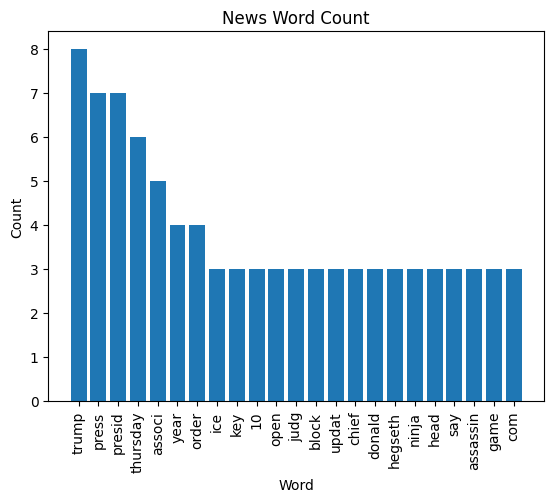

In [ ]:
wordCount
plt.xticks(rotation=90)
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('News Word Count')
plt.bar(wordCount.keys(), wordCount.values())

**Create dataframes for sentiment scores.**

In [ ]:
df = pd.DataFrame(columns=['labels'])
df = pd.DataFrame(columns=['scores'])

df['labels'] = titles
df['scores'] = content

**Display scatter plot of Headline score vs Content**

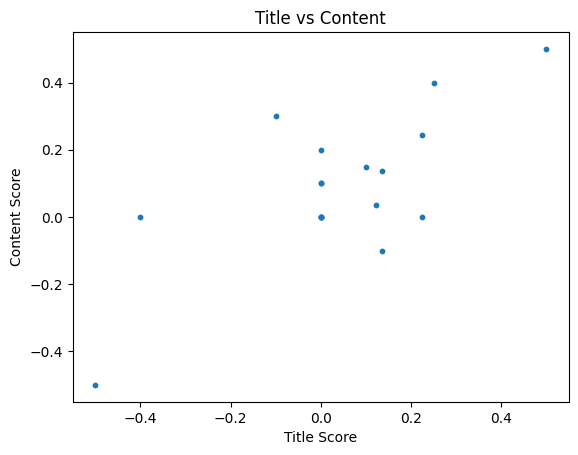

In [ ]:
plt.scatter(df['labels'], df['scores'], s = 10)
plt.xlabel('Title Score')
plt.ylabel('Content Score')
plt.title('Title vs Content')
plt.show()

**Get news from second site.**

In [ ]:
import requests
import json

titles = []
content = []
content_arr = []
title_arr = []

def my_custom_function():
    url = "https://api.worldnewsapi.com/top-news?source-country=us&language=en&date=2024-05-29"
    api_key = "6ad8e45ba8fc43feae893c37bae4e7b8"

    headers = {
        'x-api-key': api_key
    }

    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        return response.json()
    else:
        return f"Error: {response.status_code}"

# data = json.dumps(my_custom_function(), indent=4)
# print(json_str)

jresponse=my_custom_function()

for item in jresponse["top_news"]:
    for item in item["news"]:
        if isinstance(item["title"], str):
         content_arr.append(item["text"])
         title_arr.append(item["title"])
         wiki = TextBlob(item["text"])
         titles.append(wiki.sentiment.polarity)
         wiki2 = TextBlob(item["title"])
         content.append(wiki2.sentiment.polarity)

**Join strings in array and get word counts.**

<BarContainer object of 28 artists>

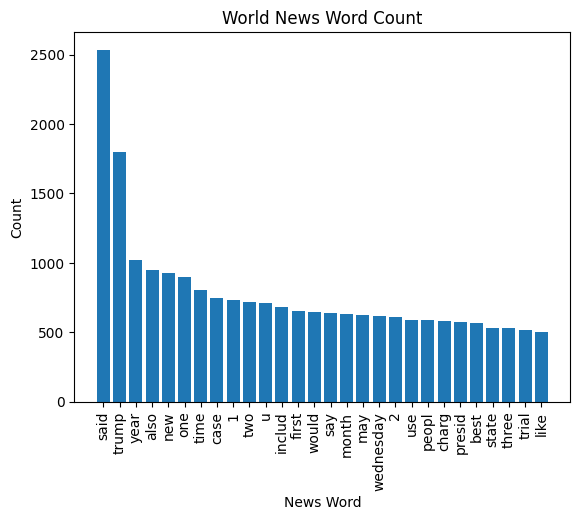

In [ ]:
from collections import Counter

text = ",".join(str(x) for x in content_arr)
text += ",".join(str(x) for x in title_arr)

data_list = text_to_word_list(text)

wordCount = Counter(data_list)

wordCount = {x: count for x, count in wordCount.items() if count >= 500}
wordCount = dict(sorted(wordCount.items(), key=lambda item: item[1], reverse=True))
wordCount
plt.xticks(rotation=90)
plt.xlabel('News Word')
plt.ylabel('Count')
plt.title('World News Word Count')
plt.bar(wordCount.keys(), wordCount.values())

In [ ]:
df = pd.DataFrame(columns=['labels'])
df = pd.DataFrame(columns=['scores'])

df['labels'] = titles
df['scores'] = content

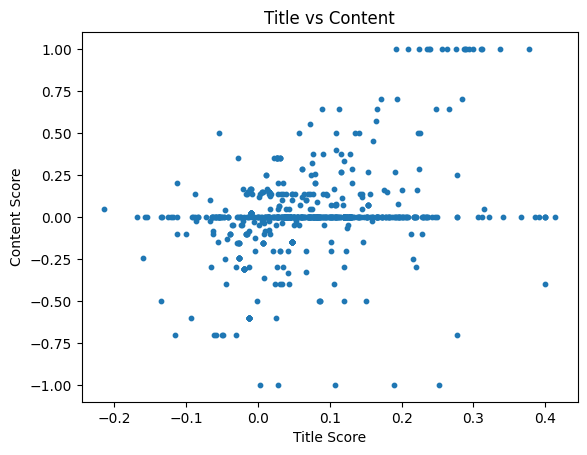

In [ ]:
plt.scatter(df['labels'], df['scores'], s = 10)
plt.xlabel('Title Score')
plt.ylabel('Content Score')
plt.title('Title vs Content')
plt.show()

In [ ]:
# print(text)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


{'neg': 0.081, 'neu': 0.814, 'pos': 0.106, 'compound': 1.0}


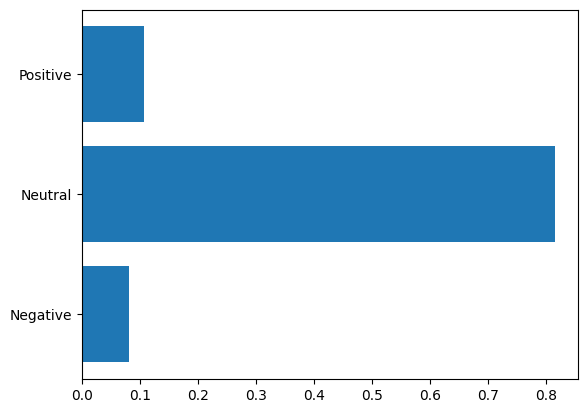

In [ ]:
import numpy as np

nltk.downloader.download('vader_lexicon')
model = SentimentIntensityAnalyzer()

scores = model.polarity_scores(text)
#print(scores['neg'])
print(scores)

x = np.array(["Negative", "Neutral", "Positive"])
y = np.array([scores['neg'], scores['neu'], scores['pos']])

plt.barh(x,y)
plt.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
X = df.iloc[:, -2:].values
y_kmeans = kmeans.fit_predict(X)

In [ ]:
y_kmeans

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Text(0.5, 1.0, 'TextBlob vs Vader K-Means Clustering')

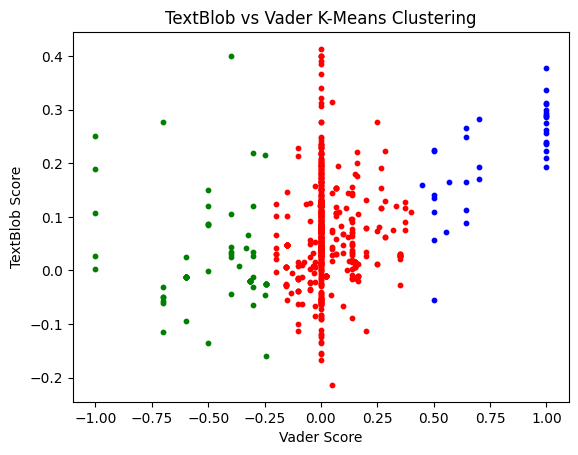

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'C1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'C2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'C3')

plt.xlabel('Vader Score')
plt.ylabel('TextBlob Score')
plt.title('TextBlob vs Vader K-Means Clustering')